In [1]:
import numpy as np
import DPMechanism as dp
import matplotlib.pyplot as plt
from time import time

# Exponential mechanism

## Classic exponential mechanism

In [2]:
utilityList = [
    ["A", "B", 1],
    ["A", "C", 2],
    ["A", "7", 2],
    ["A", "*", 2],
    ["B", "C", 2],
    ["B", "7", 2],
    ["B", "*", 2],
    ["C", "7", 1],
    ["C", "*", 2],
    ["7", "*", 2]
]
expMech = dp.ExponentialMechanism().setEpsilon(1).setUtility(utilityList)

eResults = {}
for i in range(int(1e5)):
    output = expMech.randomise("C")

    if output not in eResults:
        eResults[output] = 0
    eResults[output] += 1

print(eResults)

{'7': 22102, 'B': 13754, 'A': 13791, 'C': 36892, '*': 13461}


## Hierarchical mechanism
Should give the same output as the classic exponential mechanism above, but with the added benefit of a simpler set-up.

In [3]:
hierMech = dp.HierarchicalMechanism().setEpsilon(1).setHierarchy([["A", "B"], ["C", "7"], ["*"]])

hResults = {}
for i in range(int(1e5)):
    output = hierMech.randomise("C")

    if output not in hResults:
        hResults[output] = 0
    hResults[output] += 1

print(hResults)

{'C': 36937, 'A': 13542, '7': 22442, '*': 13669, 'B': 13410}


In [4]:
hierMech.getUtilityList()

[['A', 'B', 1],
 ['A', 'C', 2],
 ['B', 'C', 2],
 ['7', 'A', 2],
 ['7', 'B', 2],
 ['7', 'C', 1],
 ['*', 'A', 2],
 ['*', 'B', 2],
 ['*', 'C', 2],
 ['*', '7', 2]]

# Laplace mechanism

In [5]:
lMech = dp.LaplaceMechanism().setEpsilon(6).setSensitivity(1)

In [6]:
lVals = np.zeros(10000)

for i in range(lVals.size):
    lVals[i] = lMech.randomise(0.5)

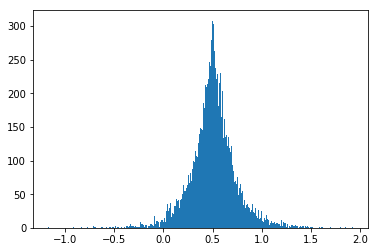

In [7]:
binWidth = 1/100
plt.hist(lVals, bins=np.arange(min(lVals), max(lVals) + binWidth, binWidth))
plt.show()

# Truncated Laplace mechanism

In [8]:
tMech = dp.TruncatedLaplaceMechanism().setEpsilon(6).setSensitivity(1).setBounds(0, 1)

In [9]:
tVals = np.zeros(100000)

for i in range(tVals.size):
    tVals[i] = tMech.randomise(0.5)

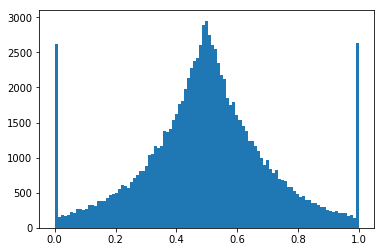

In [10]:
import matplotlib.pyplot as plt

plt.hist(tVals, bins=101)
plt.show()

# Folded Laplace mechanism

In [11]:
fMech = dp.FoldedLaplaceMechanism().setEpsilon(6).setSensitivity(1).setBounds(0, 1)

In [12]:
fVals = np.zeros(100000)

for i in range(fVals.size):
    fVals[i] = fMech.randomise(0.5)

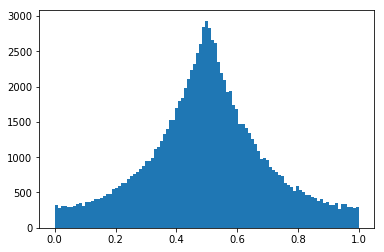

In [13]:
import matplotlib.pyplot as plt

plt.hist(fVals, bins=101)
plt.show()

# Bounded Laplace mechanism

In [14]:
bMech = dp.BoundedLaplaceMechanism().setEpsilon(6).setBounds(0,1).setSensitivity(1)

In [15]:
bVals = np.zeros(100000)

for i in range(bVals.size):
    bVals[i] = bMech.randomise(0.5)

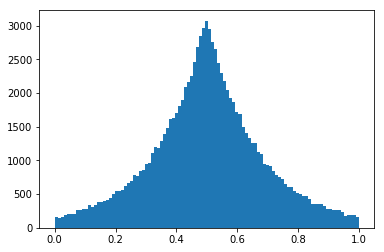

In [16]:
import matplotlib.pyplot as plt

plt.hist(bVals, bins=101)
plt.show()

# Comparison of pure, truncated, folded and bounded mechanisms

Execution times
Pure: 7.651s
Truncated: 7.600s
Folded: 8.236s
Bounded: 14.741s


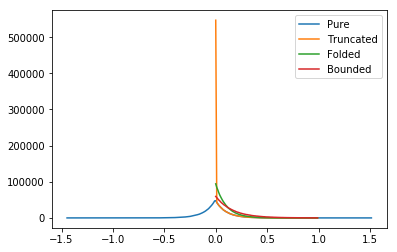

In [17]:
binWidth = 1/101
epsilon = 1
sensitivity = 0.1
upperBound = 1

mechs = [
    (dp.LaplaceMechanism().setEpsilon(epsilon).setSensitivity(sensitivity), "Pure"),
    (dp.TruncatedLaplaceMechanism().setEpsilon(epsilon).setSensitivity(sensitivity).setBounds(0, upperBound), "Truncated"),
    (dp.FoldedLaplaceMechanism().setEpsilon(epsilon).setSensitivity(sensitivity).setBounds(0, upperBound), "Folded"),
    (dp.BoundedLaplaceMechanism().setEpsilon(epsilon).setSensitivity(sensitivity).setBounds(0, upperBound), "Bounded")
]

print("Execution times")
for (mech, label) in mechs:
    vals = np.zeros(1000000)
    t = time()
    
    for i in range(vals.size):
        vals[i] = mech.randomise(0.0)
    
    valsHist, valsBins = np.histogram(vals, bins=np.arange(min(vals), max(vals) + binWidth, binWidth))
    valsBins = valsBins[:-1]
    plt.plot(valsBins, valsHist, label=label)
    print(label + ": %.3fs" % (time() - t))

    plt.legend()
plt.show()

# Testing the Data Transformer

In [18]:
testMech = dp.BoundedLaplaceMechanism().setEpsilon(1).setBounds(-0.5, 10.5).setSensitivity(10)
testMech.randomise(2)

1.6862461636664958

In [19]:
testTrans = dp.RoundedInteger(testMech)
testTrans.randomise(2)

2

In [20]:
testVals = np.zeros(100000)

for i in range(testVals.size):
    testVals[i] = testTrans.randomise(2)

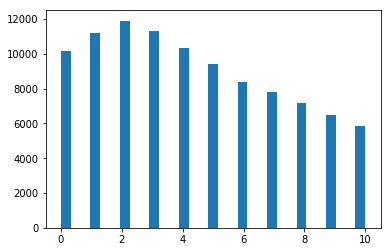

In [21]:
plt.hist(testVals, bins=31)
plt.show()

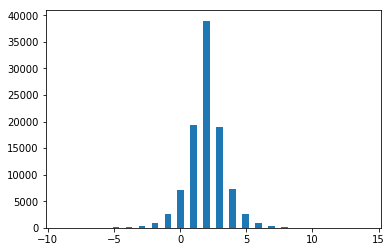

In [22]:
testTrans1b = dp.RoundedInteger(dp.LaplaceMechanism().setEpsilon(1).setSensitivity(1))
testVals1b = np.zeros(100000)

for i in range(testVals1b.size):
    testVals1b[i] = testTrans1b.randomise(2)
plt.hist(testVals1b, bins=int(testVals1b.max() - testVals1b.min())*2+1)
plt.show()

## Swap Order
In the census data, `cars_or_vans` has the following numeric values:

| Value | Label |
| :---: | --- |
| 1 | One |
| 2 | Two |
| 3 | Three |
| 4 | Four or more |
| 5 | None |

For consistency, we need to swap `None` to value `0` as a preTransform step, and swap it back to `5` in postTransform. This will ensure the Laplace mechanism prioritises values close to zero for an input value `5`. The Laplace mechanism must be initiated while taking the preTransform into account.

In [23]:
class SwapOrder(dp.DPTransformer):
    def preTransform(self, value):
        if value == 5:
            return 0
        return value

    def postTransform(self, value):
        if value == 0:
            return 5
        return value

In [24]:
testTrans2 = SwapOrder(
    dp.RoundedInteger(
        dp.BoundedLaplaceMechanism().setEpsilon(1).setBounds(-0.5, 4.5).setSensitivity(4)))

**Note:** Can also be done on a single line,
```Python
testTrans2 = SwapOrder(dp.RoundedInteger(dp.BoundedLaplaceMechanism().setEpsilon(1).setBounds(-0.5, 10.5).setSensitivity(10)))
```

In [25]:
testVals2 = np.zeros(100000)

for i in range(testVals2.size):
    testVals2[i] = testTrans2.randomise(4)

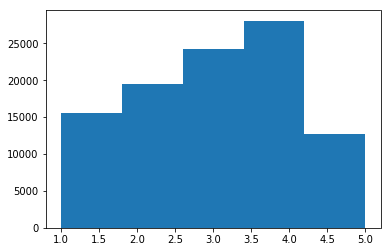

In [26]:
plt.hist(testVals2, bins=5)
plt.show()

# Geometric mechanism
The geometric mechanism is provably optimal when considering discrete inputs/outputs. The graph below shows that the geometric mechanism gives greater probability to the correct value compared to the rounded integer-valued Laplace mechanism.

In [28]:
geomMech = dp.GeometricMechanism().setEpsilon(1).setSensitivity(1)
geomMech.randomise(2)

2

In [29]:
geomVals = np.zeros(100000)

for i in range(geomVals.size):
    geomVals[i] = geomMech.randomise(2)

In [30]:
geomValsHist = np.histogram(geomVals, bins=np.arange(geomVals.min(), geomVals.max()+1))
laplValsHist = np.histogram(testVals1b, bins = np.arange(testVals1b.min(), testVals1b.max()+1))

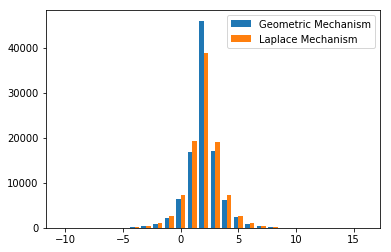

In [31]:
width = 0.4
plt.bar(geomValsHist[1][:-1] - width/2, geomValsHist[0], width, label="Geometric Mechanism")
plt.bar(laplValsHist[1][:-1] + width/2, laplValsHist[0], width, label="Laplace Mechanism")
plt.legend()
plt.show()

In [32]:
def plotDiscreteMech(mechanisms, value, samples=100000):
    width = 0.9/len(mechanisms)
    print("Execution times")
    
    for j, (mech, label) in enumerate(mechanisms):
        vals = np.zeros(samples)
        t = time()

        for i in range(samples):
            vals[i] = mech.randomise(value)

        valsHist, valsBins = np.histogram(vals, bins=np.arange(min(vals), max(vals) + 2))
        valsBins = valsBins[:-1]
        plt.bar(valsBins + width*(0.5 + j - len(mechanisms)/2), valsHist, width, label=label)
        print(label + ": %.3fs" % (time() - t))

        plt.legend()

    plt.savefig("examplfig.pdf")
    # plt.show()

Execution times
Bounded Laplace: 1.951s
Folded Laplace: 1.592s
Folded Geometric: 1.439s


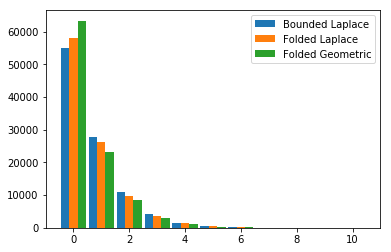

In [33]:
epsilon = 10
upperBound = 10
sensitivity = 10

mechs = [
#     (dp.GeometricMechanism().setEpsilon(epsilon).setSensitivity(sensitivity), "Pure"),
    (dp.TruncatedGeometricMechanism().setEpsilon(epsilon).setBounds(0, upperBound).setSensitivity(sensitivity), "Truncated Geometric"),
    (dp.FoldedGeometricMechanism().setEpsilon(epsilon).setBounds(-0.5, upperBound + 0.5).setSensitivity(sensitivity), "Folded Geometric"),
    (dp.RoundedInteger(dp.BoundedLaplaceMechanism().setEpsilon(epsilon).setSensitivity(sensitivity).setBounds(-0.5, upperBound + 0.5)), "Bounded Laplace")
]

fmechs = [
    (dp.RoundedInteger(
        dp.BoundedLaplaceMechanism()\
        .setEpsilon(epsilon)\
        .setBounds(-0.5, upperBound + 0.5)\
        .setSensitivity(sensitivity)), "Bounded Laplace"),
    (dp.RoundedInteger(
        dp.FoldedLaplaceMechanism()\
        .setEpsilon(epsilon)\
        .setBounds(-0.5, upperBound + 0.5)\
        .setSensitivity(sensitivity)), "Folded Laplace"),
    (dp.FoldedGeometricMechanism()\
     .setEpsilon(epsilon)\
     .setBounds(-0.5, upperBound + 0.5)\
     .setSensitivity(sensitivity), "Folded Geometric"),
]

plotDiscreteMech(fmechs, 0, 100000)

# Binary mechanism

In [34]:
binLabel1 = "Naoise"
binLabel2 = "Rahul"
binMech = dp.BinaryMechanism().setEpsilon(np.log(9)).setLabels(binLabel1, binLabel2)

In [35]:
bResults = dict.fromkeys([binLabel1, binLabel2], 0)

for i in range(100000):
    output = binMech.randomise(binLabel2)
    bResults[output] += 1
    
bResults

{'Naoise': 9959, 'Rahul': 90041}

# Refactored Geometric mechanism

In [161]:
from random import random, uniform

class newGeometricMechanism(dp.GeometricMechanism):
    def __init__(self):
        super().__init__()
        self.shape = None
        
    def randomise(self, value):
        self.checkInputs(value)
        
        if self.shape is None:
            self.shape = - self.epsilon / self.sensitivity

        u = random() - 0.5 
        u *= 1 + np.exp(self.shape)
        sgn = -1 if u < 0 else 1
        
        return int(value + sgn * np.floor(np.log(sgn * u) / self.shape))

In [150]:
newGeomMech = newGeometricMechanism().setEpsilon(1).setSensitivity(1)
oldGeomMech = dp.GeometricMechanism().setEpsilon(1).setSensitivity(1)

In [162]:
newGeomVals = np.zeros(1000000)
oldGeomVals = np.zeros(newGeomVals.size)

tic = time()
newGeomVals = [newGeomMech.randomise(2) for x in newGeomVals]
print("Time (new): %f" % (time() - tic))

tic = time()
oldGeomVals = [oldGeomMech.randomise(2) for x in oldGeomVals]
print("Time (old): %f" % (time() - tic))
    
newGeomHist = np.histogram(newGeomVals, bins=np.arange(min(newGeomVals), max(newGeomVals)+1))
oldGeomHist = np.histogram(oldGeomVals, bins=np.arange(min(oldGeomVals), max(oldGeomVals)+1))

Time (new): 8.957387
Time (old): 9.677751


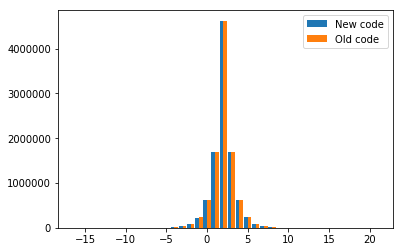

In [159]:
width = 0.45
plt.bar(newGeomHist[1][:-1] - width/2, newGeomHist[0], width, label="New code")
plt.bar(oldGeomHist[1][:-1] + width/2, oldGeomHist[0], width, label="Old code")
plt.legend()
plt.show()

In [145]:
for mech in [newGeomMech, oldGeomMech]:
    tic = time()
    for i in range(100000):
        newVal = mech.randomise(1)
        
    print("time: %f" % (time() - tic))
        

time: 0.966595
time: 1.839437


In [160]:
for _vals in [oldGeomHist, newGeomHist]:
    i = np.where(_vals[1]==2)[0][0]
    pred = _vals[0][i] * np.exp(-1)
    print("Prediction: %d, Lower: %d (%f%%), Upper: %d (%f%%)" %\
          (int(pred), _vals[0][i-1], (pred - _vals[0][i-1]) * 100 / pred, 
           _vals[0][i+1], (pred - _vals[0][i+1]) * 100 / pred))
# oldGeomHist[0][i-1], oldGeomHist[0][i] * np.exp(-1), oldGeomHist[0][i+1]

Prediction: 1699853, Lower: 1699871 (-0.001027%), Upper: 1699991 (-0.008086%)
Prediction: 1700041, Lower: 1700145 (-0.006086%), Upper: 1702034 (-0.117201%)


In [78]:
i = np.where(newGeomHist[1]==2)[0][0]
newGeomHist[0][i-1], newGeomHist[0][i] * np.exp(-1), newGeomHist[0][i+1]

(16775, 17028.403572943724, 17095)

In [25]:
oldGeomHist[0], oldGeomHist[0] * np.exp(-1)

(array([   1,    0,    3,    7,   11,   33,   88,  208,  618, 1776, 4602,
        1663,  632,  224,   89,   28,   13,    3,    1]),
 array([3.67879441e-01, 0.00000000e+00, 1.10363832e+00, 2.57515609e+00,
        4.04667385e+00, 1.21400216e+01, 3.23733908e+01, 7.65189238e+01,
        2.27349495e+02, 6.53353888e+02, 1.69298119e+03, 6.11783511e+02,
        2.32499807e+02, 8.24049948e+01, 3.27412703e+01, 1.03006244e+01,
        4.78243274e+00, 1.10363832e+00, 3.67879441e-01]))

In [26]:
newGeomHist[0], newGeomHist[0] * np.exp(-1)

(array([   3,    5,   28,   60,  153,  447, 1150, 6352, 1136,  415,  164,
          48,   20,   14,    4,    0,    1]),
 array([1.10363832e+00, 1.83939721e+00, 1.03006244e+01, 2.20727665e+01,
        5.62855545e+01, 1.64442110e+02, 4.23061357e+02, 2.33677021e+03,
        4.17911045e+02, 1.52669968e+02, 6.03322284e+01, 1.76582132e+01,
        7.35758882e+00, 5.15031218e+00, 1.47151776e+00, 0.00000000e+00,
        3.67879441e-01]))

In [49]:
u = np.exp(-4)
np.floor(np.log(np.abs(u)) / np.log(np.exp(-1)))

4.0

In [50]:
u

0.01831563888873418

In [71]:
1 - (1 - np.exp(-0.1))/2

0.04758129098202024

In [68]:
np.exp(-1)

0.36787944117144233